# Instalación de Requerimientos ✅

In [4]:
!pip install imbalanced-learn scikit-learn pandas matplotlib seaborn

Usar GPU en caso el entorno de ejecución cuente con uno, para mayor rapidez

In [5]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Las dependencias instaladas se importan

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis Exploratorio de Datos 🔎

Carga del DATASET obtenido de "https://www.kaggle.com/datasets/itssuru/hr-employee-attrition"

In [7]:
df = pd.read_csv('/content/HR-Employee-Attrition.csv')
data =  df
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [8]:
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


<ipython-input-15-40702719a52b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=data, palette='Set2')


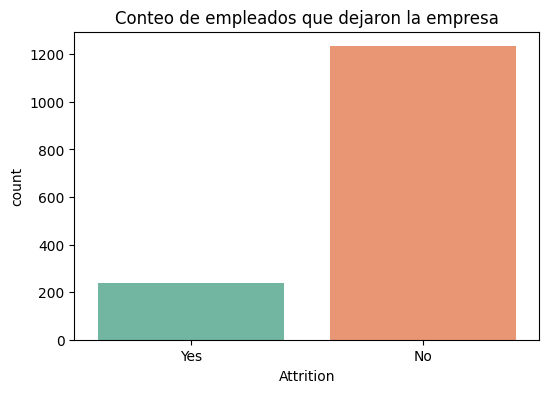

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [15]:
# Conteo de empleados que se fueron (Attrition)
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=data, palette='Set2')
plt.title("Conteo de empleados que dejaron la empresa")
plt.show()

# Mostrar porcentaje de cada clase
attrition_percentage = data['Attrition'].value_counts(normalize=True) * 100
print(attrition_percentage)

In [16]:
y = data['Attrition']
X = data.drop('Attrition', axis=1)
X = pd.get_dummies(X)
data


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Se utiliza el método SMOTE para balancear los datos y no ocurra sesgo en un clase; asimismo, evitar el sobreajuste para la clase "No", puesto que es superior en cantidad a la clase "Yes"

In [17]:
smote = SMOTE(random_state=100)
X_res, y_res = smote.fit_resample(X, y)

<ipython-input-18-5c76f2c4cf95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_res, palette='Set2')


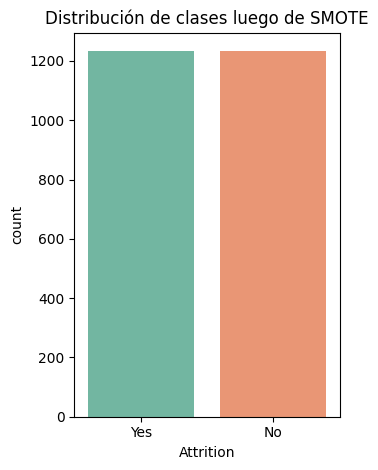

In [18]:
#Distribución de clases luego de SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_res, palette='Set2')
plt.title('Distribución de clases luego de SMOTE')

plt.tight_layout()
plt.show()

# Entrenamiento de los Modelos RF y SVM 🎓

Se realiza la partición de datos en un 70% para el entrenamiento y 30% para la prueba

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=100)


En el siguiente bloque se entrena con el modelo **Random Forest** y se evalua el rendimiento mediante una matriz con los resultados de precisión, recall, f1-score y la curva ROC

In [20]:
rf_clf = RandomForestClassifier(random_state=100)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))

y_pred_rf_prob = rf_clf.predict_proba(X_test)[:, 1]
y_test_binary = (y_test == 'Yes').astype(int)
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_pred_rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

Random Forest Classification Report
              precision    recall  f1-score   support

          No       0.92      0.97      0.94       377
         Yes       0.96      0.91      0.94       363

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740

Random Forest Confusion Matrix
[[365  12]
 [ 33 330]]


En el siguiente bloque se entrena con el modelo **Support Vector Machine** y se evalua el rendimiento mediante una matriz con los resultados de precisión, recall, f1-score y la curva ROC

In [21]:
svm_clf = SVC(probability=True, random_state=100,C=100000)
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix")
print(confusion_matrix(y_test, y_pred_svm))
y_pred_svm_prob = svm_clf.predict_proba(X_test)[:, 1]
y_test_binary = (y_test == 'Yes').astype(int)
fpr_svm, tpr_svm, _ = roc_curve(y_test_binary, y_pred_svm_prob)
roc_auc_svm = auc(fpr_svm, tpr_svm)

SVM Classification Report
              precision    recall  f1-score   support

          No       0.87      0.80      0.83       377
         Yes       0.81      0.87      0.84       363

    accuracy                           0.84       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.84      0.84      0.84       740

SVM Confusion Matrix
[[302  75]
 [ 46 317]]


# Resultados y discusiones  📊

Se realiza una matriz de confusión por cada resultado de los modelos entrenados, en este caso se realizó sobre el conjunto de pruebas. Como se puede observar, la clase "No" tiene más falsos positivos en el modelo SVM, al igual que más falsos negativos. Por lo tanto, dicha información es valiosa para determinar el modelo más adecuado para la predicción de deserción de empleados. Asimismo, la curva ROC del modelo RF es mayor al modelo SVM, ello significa que el Random Forest es mejor identificando correctamente a los empleados que abandonan la empresa y tiene menos falsos positivos.

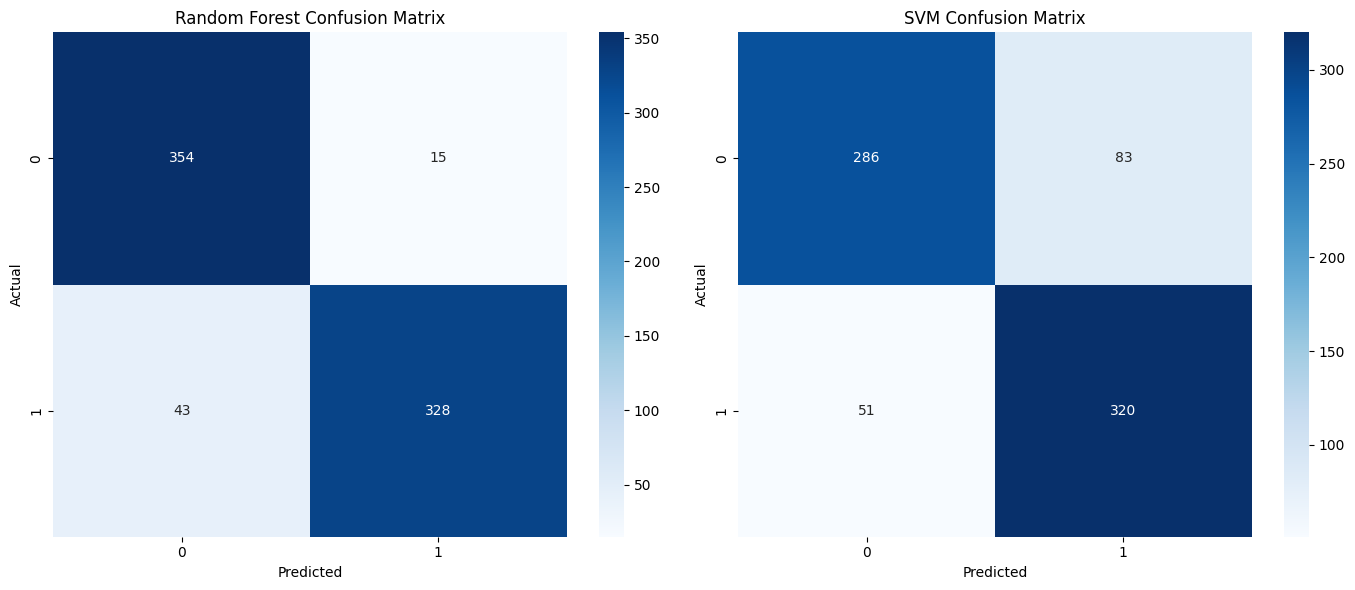

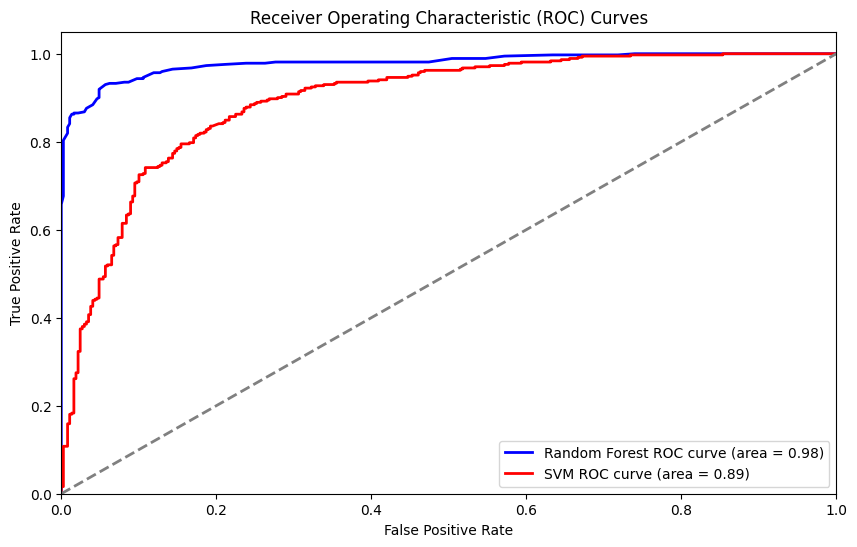

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

Por otro lado, es importante identificar la variable más significativa para determinar la deserción del empleado, ya que acorde a esta variable se pueden generar cierta toma de decisión que podría disminuir la deserción de empleado. Como se observa en la imagen, aquellos empleados que no realizan horas extras son más propensos a dejar la empresa. Ello quiere decir que los empleados que no hacen horas extras podrían estar menos comprometidos o satisfechos, y por eso dejan la empresa.

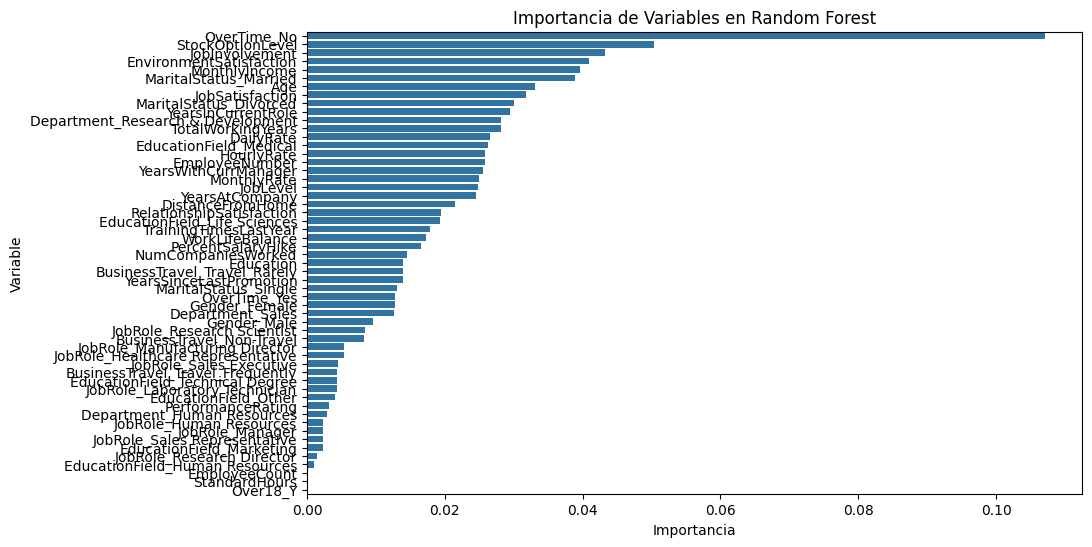

In [23]:
importances = rf_clf.feature_importances_
feature_importances = pd.DataFrame({'Variable': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Variable', data=feature_importances)
plt.title('Importancia de Variables en Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()